# An experiment to check the impact of hyperparameter tuning on EHR-ML modelling

## Read the data

In [1]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,4.37,9.5,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,3.29,7.6,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,3.34,7.9,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,3.14,8.2,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,3.37,8.1,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,4.10,8.0,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,3.80,8.5,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0


## With hyperparameter tuning

In [2]:
import os
from pathlib import Path


Path(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/testing').mkdir(parents=True, exist_ok=True)

os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb 30 -wa 3 -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/rebuttal/tuned_hyperparameters.json'''
)


2024-06-14 16:08:54,066 - EHR-ML - INFO - Parsing command line arguments
2024-06-14 16:08:54,067 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/final/data_matrix.csv
2024-06-14 16:08:54,067 - EHR-ML - INFO - args.target_column: death_adm
2024-06-14 16:08:54,067 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2024-06-14 16:08:54,067 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2024-06-14 16:08:54,067 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2024-06-14 16:08:54,067 - EHR-ML - INFO - args.window_before: 30
2024-06-14 16:08:54,067 - EHR-ML - INFO - args.window_after: 3
2024-06-14 16:08:54,067 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/testing/tuned_hyperparameters.json
2024-06-14 16:08:54,067 - EHR-ML - INFO - Reading data from file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/final/data_matrix

## With no hyperparameter tuning

In [ ]:
import os
from pathlib import Path


Path(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/testing').mkdir(parents=True, exist_ok=True)

os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb 30 -wa 3 -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/rebuttal/not_tuned_hyperparameters.json'''
)


## Plot

In [13]:
import os
import json


tunedHyperparametersPath = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/rebuttal/tuned_hyperparameters.json'''

notTunedHyperparametersPath = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/rebuttal/not_tuned_hyperparameters.json'''

with open(tunedHyperparametersPath, 'r') as tf:
    tunedHyperparametersJson = json.load(tf)

with open(notTunedHyperparametersPath, 'r') as ntf:
    notTunedHyperparametersJson = json.load(ntf)

In [14]:
import pandas as pd

tunedHyperparametersDf = pd.DataFrame(tunedHyperparametersJson)
tunedHyperparametersDf['Hyperparameters'] = 'Tuned'
tunedHyperparametersDf

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_average_precision,test_f1,test_roc_auc,test_mccf1_score,Hyperparameters
0,0.344530,0.022771,0.897390,0.631017,0.472839,0.393617,0.793286,0.518929,Tuned
1,0.304488,0.022088,0.888288,0.602757,0.398803,0.326087,0.763359,0.464811,Tuned
2,0.316979,0.029238,0.888288,0.612675,0.394900,0.347368,0.781823,0.480316,Tuned
3,0.320629,0.023174,0.898198,0.671190,0.485931,0.464455,0.827967,0.570553,Tuned
4,0.328331,0.021647,0.888288,0.622594,0.429900,0.367347,0.787148,0.494939,Tuned


In [15]:
import pandas as pd

notTunedHyperparametersDf = pd.DataFrame(notTunedHyperparametersJson)
notTunedHyperparametersDf['Hyperparameters'] = 'Not Tuned'
notTunedHyperparametersDf

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_average_precision,test_f1,test_roc_auc,test_mccf1_score,Hyperparameters
0,0.366737,0.022582,0.891989,0.624649,0.417566,0.375000,0.770206,0.502358,Not Tuned
1,0.357133,0.021799,0.884685,0.597408,0.370030,0.311828,0.757745,0.452398,Not Tuned
2,0.378099,0.022545,0.885586,0.597919,0.404079,0.313514,0.797324,0.454115,Not Tuned
3,0.308712,0.021420,0.899099,0.658477,0.508411,0.445545,0.819913,0.557209,Not Tuned
4,0.316715,0.021293,0.889189,0.639635,0.413312,0.400000,0.786712,0.519368,Not Tuned


In [17]:
hyperparametersDf = pd.concat([tunedHyperparametersDf, notTunedHyperparametersDf], ignore_index=True)
hyperparametersDf

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_average_precision,test_f1,test_roc_auc,test_mccf1_score,Hyperparameters
0,0.344530,0.022771,0.897390,0.631017,0.472839,0.393617,0.793286,0.518929,Tuned
1,0.304488,0.022088,0.888288,0.602757,0.398803,0.326087,0.763359,0.464811,Tuned
2,0.316979,0.029238,0.888288,0.612675,0.394900,0.347368,0.781823,0.480316,Tuned
3,0.320629,0.023174,0.898198,0.671190,0.485931,0.464455,0.827967,0.570553,Tuned
4,0.328331,0.021647,0.888288,0.622594,0.429900,0.367347,0.787148,0.494939,Tuned
5,0.366737,0.022582,0.891989,0.624649,0.417566,0.375000,0.770206,0.502358,Not Tuned
6,0.357133,0.021799,0.884685,0.597408,0.370030,0.311828,0.757745,0.452398,Not Tuned
7,0.378099,0.022545,0.885586,0.597919,0.404079,0.313514,0.797324,0.454115,Not Tuned
8,0.308712,0.021420,0.899099,0.658477,0.508411,0.445545,0.819913,0.557209,Not Tuned
9,0.316715,0.021293,0.889189,0.639635,0.413312,0.400000,0.786712,0.519368,Not Tuned


[Text(0, 0.5, 'Accuracy')]

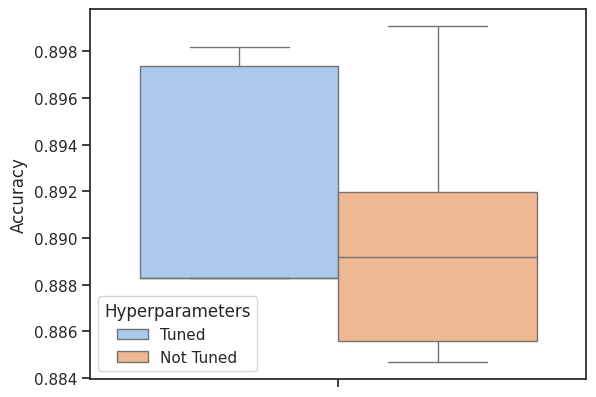

In [30]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="test_accuracy",
            hue="Hyperparameters",
            data=hyperparametersDf
            ).set(
                ylabel='Accuracy'
            )


[Text(0, 0.5, 'Balanced Accuracy')]

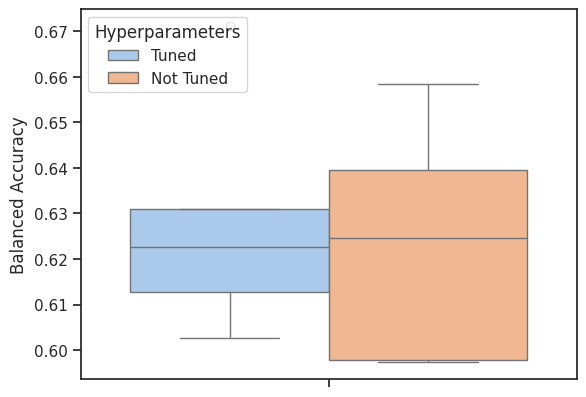

In [32]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="test_balanced_accuracy",
            hue="Hyperparameters",
            data=hyperparametersDf
            ).set(
                ylabel='Balanced Accuracy'
            )


[Text(0, 0.5, 'Average Precision')]

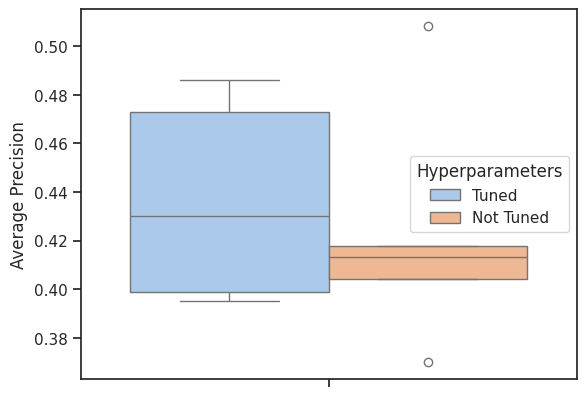

In [33]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="test_average_precision",
            hue="Hyperparameters",
            data=hyperparametersDf
            ).set(
                ylabel='Average Precision'
            )


[Text(0, 0.5, 'F1 Score')]

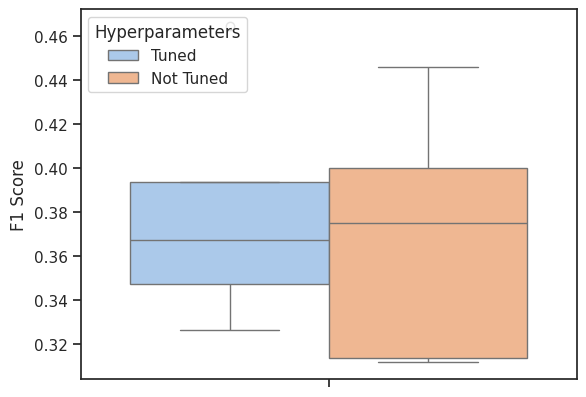

In [37]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="test_f1",
            hue="Hyperparameters",
            data=hyperparametersDf
            ).set(
                ylabel='F1 Score'
            )


[Text(0, 0.5, 'AUROC')]

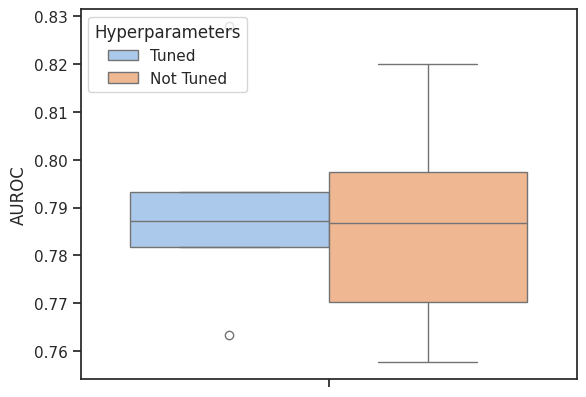

In [35]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="test_roc_auc",
            hue="Hyperparameters",
            data=hyperparametersDf
            ).set(
                ylabel='AUROC'
            )


[Text(0, 0.5, 'MCC-F1 Score')]

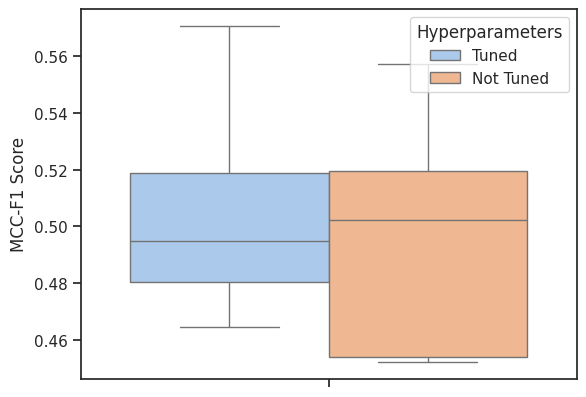

In [36]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="test_mccf1_score",
            hue="Hyperparameters",
            data=hyperparametersDf
            ).set(
                ylabel='MCC-F1 Score'
            )


[Text(0, 0.5, 'AUROC')]

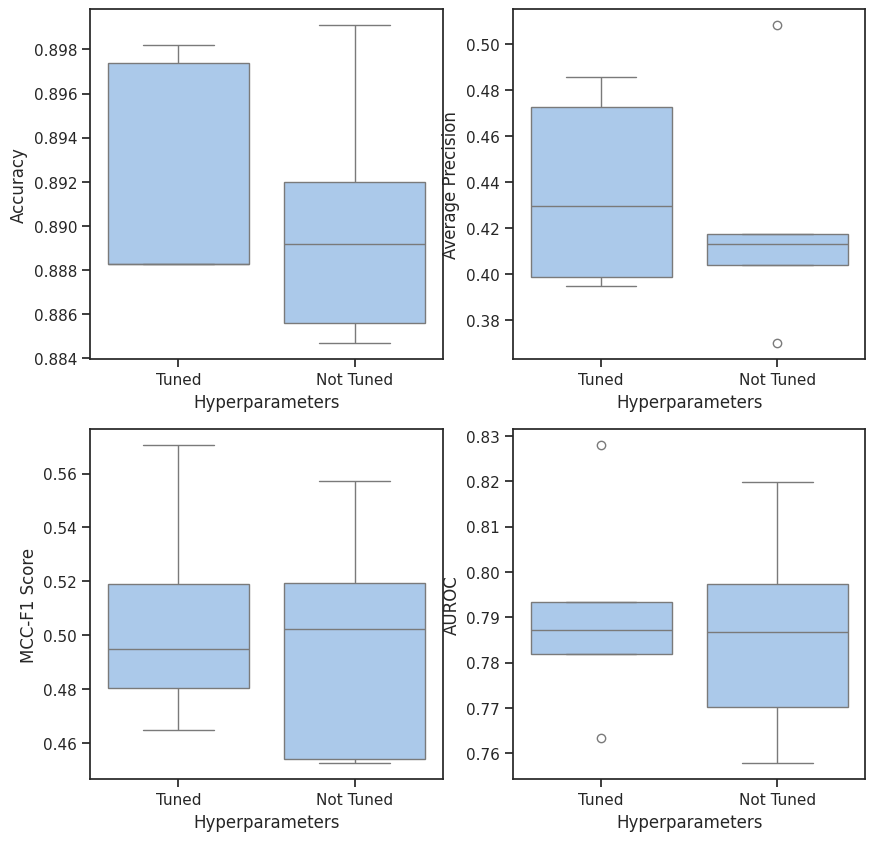

In [46]:
from matplotlib import pyplot as plt


f, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(y="test_accuracy",
            x="Hyperparameters",
            data=hyperparametersDf,
            ax=axes[0][0]
            ).set(
                ylabel='Accuracy'
            )

sns.boxplot(y="test_average_precision",
            x="Hyperparameters",
            data=hyperparametersDf,
            ax=axes[0][1]
            ).set(
                ylabel='Average Precision'
            )
sns.boxplot(y="test_mccf1_score",
            x="Hyperparameters",
            data=hyperparametersDf,
            ax=axes[1][0]
            ).set(
                ylabel='MCC-F1 Score'
            )
# Draw a nested boxplot to show bills by day and time
sns.boxplot(y="test_roc_auc",
            x="Hyperparameters",
            data=hyperparametersDf,
            ax=axes[1][1]
            ).set(
                ylabel='AUROC'
            )
